# Homework 1
- Student : Dayana Valentina Gonzalez Vargas 

## Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

1. Write down a code able to identify whether a pair of segments share points.
Three possible answers should be available: segments do not intersect, segments do intersect
giving the intersection point, and segments do intersect giving an intersection
interval.


### Idea del codigo realizado.
- Para realizar en siguiente codigo, tuve en cuenta el producto cruz desarrollado en clase. Además como cada uno se los puntos dados por el ejercicio son paralelos, donde pueden poser un punto, un segmento en común o ningu de estos. Realice un caso más a los placticado en clase, donde el producto cruz entre todos los diferentes puntos sean cero, así ya que son paralelos puedo encontrar su punto o segmento en común. Ya que, un punto debe estar contenido en el otro segmento, tomado principalmente la seiguiente desigualdad como guia para ver si un segmento contiene a un punto de otro segmento o tienen dos puntos iguales. 

$P_{k} \in \hat{P_{i}P{j}}$ si $d_{k} = 0$
y $min(x_{i},x_{j}) \leqslant x_{k} \leqslant max(x_{i},x_{j}) $,
$min(y_{i},y_{j}) \leqslant y_{k} \leqslant max(y_{i},y_{j}) $

Además, en clase vimos una manera de encontrar los puntos de corte, él cual no funciona muy bien para segmentos paralelos, en donde, decidi tomar la misma desigualdad anterior para ver cual punto era él que se contenia y encontrar el segmento o punto que es la intersección de ambos segmentos.



In [3]:
def Cross_product(P0,P1,P2):
    d = ((P1[0]-P0[0])*(P2[1]-P0[1]))-((P2[0]-P0[0])*(P1[1]-P0[1]))
    return d

In [20]:
# Create class about segments S(x1,y1,x2,y2)
class S:
    def __init__(self, x1,y1, x2,y2 ):
        self.point1 = [x1,y1]
        self.point2 = [x2,y2]

In [21]:
def Cut_point(P1,P2,P3,P4): 
    Pc = [] #Empty List, where i'm going to add the cut points.  
    beta = 0 #Parameter 1
    alpha = 0 #Parameter 2
    det1 = (P3[0]-P4[0])*(P2[1]-P1[1]) 
    det2 = (P2[0]-P1[0])*(P3[1]-P4[1])
    if det1 != det2:
        beta = (1/(det1-det2))*(((P2[1]-P1[1])*(P2[0]-P4[0]))+((P1[0]-P2[0])*(P2[1]-P4[1])))
        alpha = (1/(det1-det2))*(((P4[1]-P3[1])*(P2[0]-P4[0]))+((P3[0]-P4[0])*(P2[1]-P4[1])))
        Pc1 = alpha*P1[0]+(1-alpha)*P2[0]
        Pc2 = beta*P1[1]+(1-beta)*P2[1]
        Pc = [Pc1,Pc2]
        print(Pc1)
    elif ( P1 == P3):
        Pc = P1
    elif ( P2 == P3):
        Pc = P2
    elif ( P1 == P4):
        Pc = P1
    elif ( P2 == P4):
        Pc = P2
    elif (min(P3[0],P4[0])<=P2[0]<=max(P3[0],P4[0]))and (min(P3[1],P4[1])<=P2[1]<=max(P3[1],P4[1])):
        print("Contienen el punto", P2)
        Pc = str(min(P2,P3,P4))+ ' a ' + str(max(P2,P3, P4))
    elif (min(P3[0],P4[0])<=P1[0]<=max(P3[0],P4[0]))and (min(P3[1],P4[1])<=P1[1]<=max(P3[1],P4[1])):
        print("Contienen el punto", P1)
        Pc = str(min(P1,P3,P4))+ ' a ' + str(max(P1,P3, P4))
    elif (min(P2[0],P1[0])<=P3[0]<=max(P2[0],P1[0]))and (min(P2[1],P1[1])<=P3[1]<=max(P2[1],P1[1])):
        print("Contienen el punto", P3)
        Pc = str(min(P2,P3,P1))+ ' a ' + str(max(P2,P3, P1))
    elif (min(P2[0],P1[0])<=P4[0]<=max(P2[0],P1[0]))and (min(P2[1],P1[1])<=P4[1]<=max(P2[1],P1[1])):
        print("Contienen el punto", P4)
        Pc = str(min(P2,P4,P1))+ ' a ' + str(max(P2,P4, P1))
    else:
        print("Son segmentos paralelos no tendrían puntos de corte")
    
    return Pc

In [26]:
def Intersec_segments(P1,P2,P3, P4):
    # Recordatorio dk hace referencia a que el pk es el origen que va para pi y pj
    d1 = Cross_product(P1,P4,P3)
    d2 = Cross_product(P2,P4,P3)
    d3 = Cross_product(P3,P2,P1)
    d4 = Cross_product(P4,P2,P1)
    # Asignar una variable True o False para ver si se cruzan o no.
    c = False
    # Condiciones para saber si se cruzan o no los segmentos
    if (d1*d2)<0 and (d4*d3)<0:
        c = True
        print("Los dos segmentos SE CRUZAN")
    elif (d1*d2)>0 and (d3*d4)>0:
        c = False
        print("Los dos segmentos NO SE CRUZAN")
    elif (d1*d2)<0 and d4==0:
        if (min(P1[0],P2[0])<=P4[0]<=max(P1[0],P2[0]))and (min(P1[1],P2[1])<=P4[1]<=max(P1[1],P2[1])):
            c = True
            print("Los dos segmentos SE CRUZAN")
        else:
            c = False
            print("Los dos segmentos NO SE CRUZAN")
    elif (d1*d2)<0 and d3==0:
        if (min(P1[0],P2[0])<=P3[0]<=max(P1[0],P2[0]))and (min(P1[1],P2[1])<=P3[1]<=max(P1[1],P2[1])):
            c = True
            print("Los dos segmentos SE CRUZAN")
        else:
            c = False
            print("Los dos segmentos NO SE CRUZAN")
    elif (d4*d3)<0 and d2==0:
        if (min(P3[0],P4[0])<=P2[0]<=max(P4[0],P3[0]))and (min(P4[1],P3[1])<=P2[1]<=max(P4[1],P3[1])):
            c = True
            print("Los dos segmentos SE CRUZAN")
        else:
            c = False
            print("Los dos segmentos NO SE CRUZAN")
    elif (d4*d3)<0 and d1==0:
        if (min(P3[0],P4[0])<=P1[0]<=max(P3[0],P4[0]))and (min(P3[1],P4[1])<=P2[1]<=max(P3[1],P4[1])):
            c = True
            print("Los dos segmentos SE CRUZAN")
        else:
            c = False
            print("Los dos segmentos NO SE CRUZAN")
    elif (d1 == 0) and (d2 == 0) and (d3 == 0) and (d4 == 0):
        if (min(P3[0],P4[0])<=P1[0]<=max(P3[0],P4[0]))and (min(P3[1],P4[1])<=P2[1]<=max(P3[1],P4[1])):
            c = True
            print("Los dos segmentos SE CRUZA1N y tienen puntos en comun")
        elif (min(P3[0],P4[0])<=P2[0]<=max(P3[0],P4[0]))and (min(P3[1],P4[1])<=P2[1]<=max(P3[1],P4[1])):
            c = True
            print("Los dos segmentos SE CRUZAN y tienen puntos en comun")
        else:
            c = False
            print("No se cruzan pero son paralelos")
    
    elif (d1*d2)>0 and d4==0:
        c = False
        print("Los dos segmentos NO SE CRUZAN")
    elif (d3*d4)>0:
        c = False
        print("Los dos segmentos NO SE CRUZAN")
    else:
        print("No esta el caso")
    
    #Evalua puntos de corte
    if c == True:
        Pc = Cut_point(P1,P2,P3,P4)
        print('La intersección se encuentra en:', Pc)
    else:
        Pc = 0

In [23]:
def graphic_segments(P1,P2,P3,P4):
    P1x,P1y = [P1[0],P2[0]],[P1[1],P2[1]] 
    P2x,P2y = [P3[0],P4[0]],[P3[1],P4[1]] 
    
    plt.clf()
    plt.plot(P1[0],P1[1],"ro")
    plt.plot(P2[0],P2[1],"ro")
    plt.plot(P3[0],P3[1],"ro")
    plt.plot(P4[0],P4[1],"ro")
    plt.plot(P1x,P1y)
    plt.plot(P2x,P2y)
    plt.annotate("P1", (P1[0],P1[1]),(P1[0] + 0.01, P1[1]))
    plt.annotate("P2", (P2[0],P2[1]),(P2[0] + 0.01, P2[1]))
    plt.annotate("P3", (P3[0],P3[1]),(P3[0] + 0.01, P3[1]))
    plt.annotate("P4", (P4[0],P4[1]),(P4[0] + 0.01, P4[1]))
    plt.show()

In [24]:
#Main and result
# List the segments
S1 = S(1,2,3,4)
S2 = S(3,4,5,6)
S3 = S(2,3,5,6)
S4 = S(4,5,5,6)

### Intersection of S1 with S2

Los dos segmentos SE CRUZAN y tienen puntos en comun
La intersección se encuentra en: [3, 4]


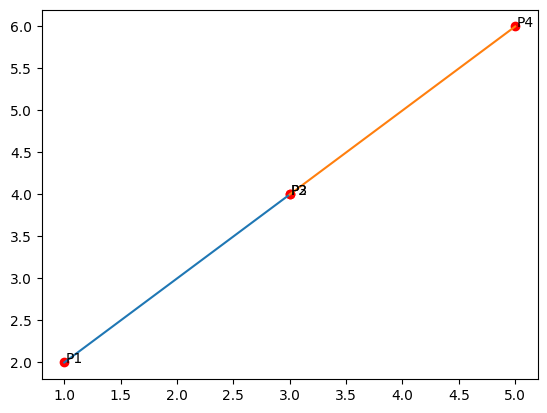

In [28]:
Intersec_segments(S1.point1,S1.point2,S2.point1,S2.point2)
graphic_segments(S1.point1,S1.point2,S2.point1,S2.point2)

### Intersection of S1 with S3

Los dos segmentos SE CRUZAN y tienen puntos en comun
Contienen el punto [3, 4]
La intersección se encuentra en: [2, 3] a [5, 6]


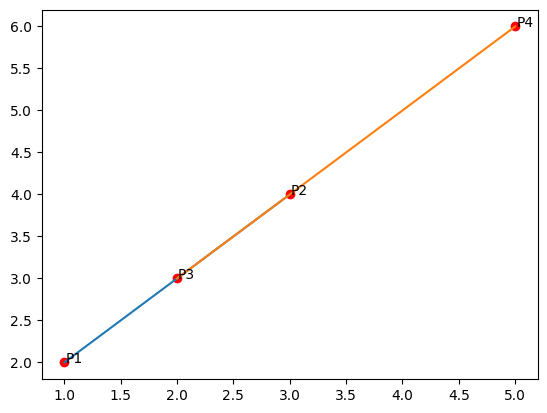

In [29]:
Intersec_segments(S1.point1,S1.point2,S3.point1,S3.point2)
graphic_segments(S1.point1,S1.point2,S3.point1,S3.point2)

### Intersection of S1 with S4

No se cruzan pero son paralelos


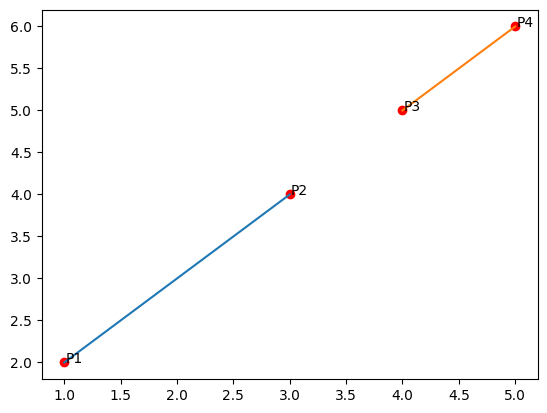

In [30]:
Intersec_segments(S1.point1,S1.point2,S4.point1,S4.point2)
graphic_segments(S1.point1,S1.point2,S4.point1,S4.point2)

2. Search for the divide and conquer algorithm for the construction of the
convex hull of a set of points.
- Implement the algorithm for the points in the attached file (points ch.txt). Illustrate
the process with plots.

## Partición del conjunto en dos mini conjuntos

In [4]:
# primero: Organizar el arreglo de puntos en forma acsdente x-coordenada
def Sort_array(P):
    New_array = []
    for i in range(len(P)):
        New_array.append([P[i][0], P[i][1]])
    x_coor = lambda New_array: New_array[0]
    New_array.sort(key = x_coor)   
    return New_array 


In [5]:
#Segundo: Dividimos los puntos en dos conjuntos S1 son los puntos más a la izquierda del
#  medio en la cordenada X.
# Y S2 los puntos más a la derecha de la medio en la coordenada X.
def divide_halves(P):
    S1 = []
    S2 = []
    mid = int(len(P)/2)
    S1 = P[:mid]
    S2 = P[mid:]
    return S1,S2


### Codigo Convex Hull

In [6]:
#Angulo con la pendiente
def ang2(x0,y0,xn,yn):
    m1 = yn-y0
    m2 = xn-x0
    theta = np.arctan2(m1,m2)
    return(theta)

In [7]:
def dist(x0,y0,x1,y1):
    di = np.sqrt((x1-x0)^2 + (y1-y0)^2)
    return di 

In [8]:
def grafic_hull(S1,P01,x,y,N1):
    xcor1 = []
    ycor1 = []

    for n in range (len(S1)):
        xcor1.append(S1[n][0])
        ycor1.append(S1[n][1])
    
    
    plt.scatter(x,y)
    plt.plot(P01[0],P01[1], "ro")
    for n in range(N1):
        num = "P"+str(n)
        #print(num)
        plt.annotate(num , xy = (S1[n][0], S1[n][1]), xytext=(S1[n][0], S1[n][1]))
    plt.plot(xcor1,ycor1)
    plt.show()

In [9]:
def angles_sort(P0,P_new):
    a = [] #Lista de punto con su respectivo angulo
    angles=[] #lista de angulos
    for n in P_new:
        m = ang2(P0[0],P0[1],n[0],n[1])
        if m is angles:
            # Revisar que si tienen el mismo angulo escoger el de la mayor distancia
            index = angles.index(m)
            p_prev = P_new[index]
            d1 = dist(P0[0],P0[1],n[0],n[1])
            d2 = dist(P0[0],P0[1],p_prev[0],p_prev[1])
            if d1 > d2:
                a[index]=[n[0],n[1],m]
        else:
            a.append([n[0],n[1],m])
            angles.append(m)


    # 3.Debemos ordenar con respecto al angulo la lista
    angulo = lambda a:a[2]
    a.sort(key=angulo) #Organizado
    #print(a)
    #Vamos a revisar si encontramos dos puntos con la misma pendiente para tomar el que tenga 
    # la distancia más larga.
    # 4. Agrupo los puntos en una pila con el orden anterior
    p_sort_pila = []
    for k in a:
        p_sort_pila.append([k[0],k[1]])
    return p_sort_pila

In [10]:
def Algoritmo_Graham(X,Y,P):
    #Notemos que el arreglo ya entra organizado por la coordenada X, ya que en los puntos anteriores
    #Partimos por la coordenada X, ordenada de forma ascendente
    P0 = P[0]
    #print("Punto de partida:",P0)

    #Quitamos el P0 de P creando así P nuevo
    P_new =[]
    for i in range(len(P)):
        if np.all(P[i] != P0):
            P_new.append(P[i])

    #print(P_new)

    #2. Calculo las pendientes de P0 -> Pi 
    p_sort_pila = angles_sort(P0,P_new)
    #print(p_sort_pila)
    #5. Definimos el arreglo S que es el conjunto con los vertices del poligono
    S = []
    #6. Agegamos P0, P1, y P2 en la pila 
    S.append(P0)
    S.append(p_sort_pila[0])
    S.append(p_sort_pila[1])
    #print(S)
    #print(p_sort_pila)
    #8. Reviso que todos vayan para la izquierda desde i = 3
    #g = False #Suponiendo que da vuelta a la izquierda
    for i in range(2,len(p_sort_pila)):
        #grafic_hull(S,P0,X,Y,len(S))
        S.append(p_sort_pila[i])
        d = Cross_product(S[-3],S[-2],S[-1])
        while(d <= 0):
            S.pop(-2) #Elimino el penultimo de S 
            d = Cross_product(S[-3],S[-2],S[-1])
    #Por ultimo agregamos P0 otra vez   
    S.append(P0)
    #print(S)
    return S, P0


## Parte de unir los dos convex hull

In [25]:
# Para ver la Orientación entre los segmentos.
def orientation(P0,P1,P2):
    d = Cross_product(P0, P1, P2)
    if d > 0: # Giro en sentido anti-horario
        return 1
    elif d == 0: # Paralelos
        return 0
    else:  # Giro en sentido horario
        return -1


In [95]:
def find_upper_tanget(S1,S2):
    # primero debemos encontra el punto en S1 que esta más a la derecha y
    # El punto en S2 que esta más a la izquierda.
    # Y debemos guardar sus indices
    n1 = len(S1)
    n2 = len(S2)
    i_1 = 0 #Va a guardar el indice del punto en S1 más a la derecha
    i_2 = 0 #Va a guardar el indice del punto en S2 más a la Izquierda
    for i in range(n1):
        if S1[i][0] > S1[i_1][0]:
            S1[i][0]
            i_1 = i
    
    for i in range(n2):
        if S2[i][0] <  S2[i_2][0]:
            S2[i][0]
            i_2 = i

    # Ya que encontramos los indices vamos a encontrar L1 que es la primera recta tangente, luego viendo 
    #La orientación vamos a encontrar la tangente superior L5 la cual va a ser como vamos a unir
    # Ambos convex hull S1 y S2
    #print(S1[i_1])
    #print(S2[i_2])
    Done = False
    while(Done != True):
        Done = False
        while(orientation(S1[i_1],S2[i_2-1],S2[i_2]) >= 0):
            i_2= i_2 - 1
            print(S1[i_1])
            print(S2[i_2])
        while(orientation(S2[i_2],S1[i_1+1],S1[i_1]) <= 0):
            i_1 = i_1+1 
            print(S1[i_1])
            print(S2[i_2])
            Done = True
            
    #print(S1[i_1])
    #print(S2[i_2])
    return S1[i_1], S2[i_2]
    
    

    

    


    


In [91]:
def quick_hull(P):
    X = []
    Y = []
    #Separaremos los puntos de P en X y Y
    for n in range(len(P)):
        X.append(P[n][0])
        Y.append(P[n][1])

    K = Sort_array(P)
    K1,K2 = divide_halves(K)
    S1,P01 = Algoritmo_Graham(X,Y,K1)
    S2,P02= Algoritmo_Graham(X,Y,K2)
    grafic_hull(S1,P01, X, Y, len(S1))
    grafic_hull(S2,P02, X, Y, len(S2))
    u1,u2 = find_upper_tanget(S1,S2)
    S = S1+S2
    xcor1 =[]
    ycor1 =[]
    for n in range (len(S)):
        xcor1.append(S[n][0])
        ycor1.append(S[n][1])

    plt.plot(u1[0],u1[1], "ro")
    plt.plot(u2[0],u2[1], "ro")
    plt.scatter(xcor1,ycor1)
    plt.show()
    


     

In [15]:
P = np.round(np.random.rand(20,2),4)

20


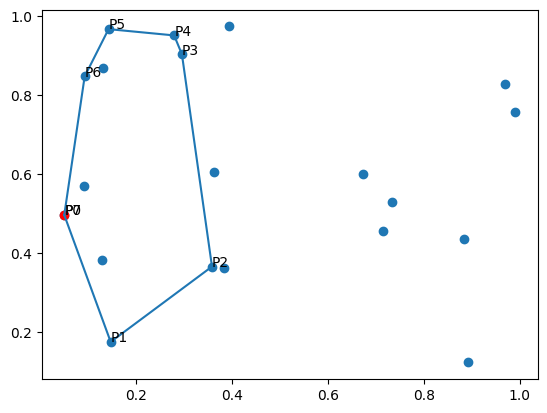

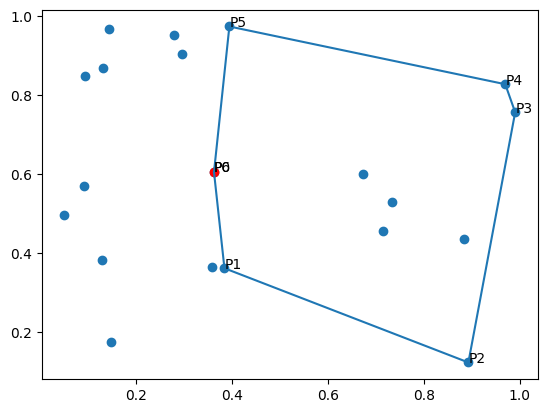

[0.3578, 0.3662]
[0.362, 0.605]
[0.3578, 0.3662]
[0.3941, 0.9733]
[0.3578, 0.3662]
[0.9701, 0.8273]
[0.3578, 0.3662]
[0.9908, 0.7563]
[0.3578, 0.3662]
[0.8931, 0.1237]


KeyboardInterrupt: 

In [96]:
print(len(P))

quick_hull(P)